<a href="https://colab.research.google.com/github/zavaleta/UNT_2020/blob/master/Clase_unt_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Data Science
## Universidad Nacional de Trujillo - Perú
### Enero 08 a 15 de 2020
#### Prof. Dr. Jorge Zavaleta
##### zavaleta.jorge@gmail.com

# Machine Learning (Aprendizaje de Máquina)

## Tipos de aprendizaje

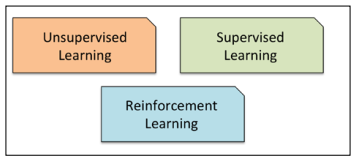

## Aprendizaje Supervisionado para predezir comportormientos futuros

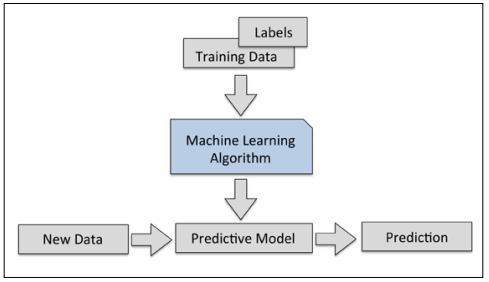

## Regresión Lineal Simples

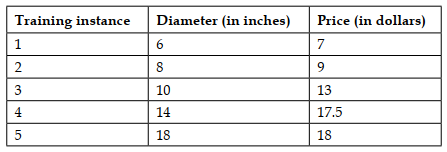

La tabla presenta una lista de precios y diametros de pizzas que generalmente se consume. El objetivo es predecir los precios de pizzas no previstas en el menu.

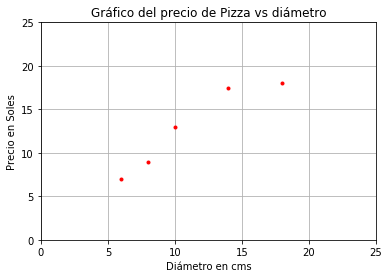

In [1]:
# Ejemplo de regresion leneal simples
import matplotlib.pyplot as plt
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
plt.figure()
plt.title('Gráfico del precio de Pizza vs diámetro')
plt.xlabel('Diámetro en cms')
plt.ylabel('Precio en Soles')
plt.plot(X, y, 'r.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

## Ejemplo de uso de Regresión Leneal

In [2]:
# Ejemplo de regresión lineal
import numpy as np
from sklearn.linear_model import LinearRegression
# datos de entrenamiento
X = np.array([[6], [8], [10], [14], [18]])
y = np.array([[7], [9], [13], [17.5], [18]])
# Modelo de creación: 
model = LinearRegression()
model.fit(X, y) # modelo del entrenamiento de los datos
# Introduzir os diámtros de las pizzas
teste_pizza = np.array([[15]])
# predezir el precio de la pizza
valor_pizza = model.predict(teste_pizza)[0]
print('El valor de la pizza es ',valor_pizza)

El valor de la pizza es  [16.60991379]


In [3]:
# Ejemplo de regresión lineal usando conjuntos de teste
import numpy as np
from sklearn.linear_model import LinearRegression
# datos de entrenamiento
X = np.array([[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]])
#X = np.array([[6], [8], [10], [14], [18]])
y = np.array([[7], [9], [13], [17.5], [18]])
model = LinearRegression()
model.fit(X, y)
X_test = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
#X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]
# predezir os valores
predictions = model.predict(X_test)
for i, prediction in enumerate(predictions):
    print('Predictezido: %s, objetivo: %s' % (prediction, y_test[i]))
print('R-squared: %.2f' % model.score(X_test, y_test))

Predictezido: [10.0625], objetivo: [11]
Predictezido: [10.28125], objetivo: [8.5]
Predictezido: [13.09375], objetivo: [15]
Predictezido: [18.14583333], objetivo: [18]
Predictezido: [13.3125], objetivo: [11]
R-squared: 0.77


# Perceptron

In [4]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
X, y = load_digits(return_X_y=True)
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)
Perceptron()
clf.score(X, y)

0.9393433500278241

# Ejemplo Perceptron con el dataset Iris

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [0]:
# preparando os datos
iris = datasets.load_iris() # base de datos existente en el colab
x = iris.data
y = iris.target

### La base de datos tiene 4 variables

In [7]:
# Observando os objetivos
print(y[:5])

[0 0 0 0 0]


In [8]:
# mostrar as 5 primeras lineas
print(x[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Cortando os elementos en conjuntos de teste y entrenamiento

In [0]:
# contando los elementos en conjuntos de teste y entrenamiento
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

El perceptron necesita que los datos sean estandares para ser clasificados. Para eso usar la función StandardScaler().


In [0]:
# estandarizando los datos
estandar = StandardScaler()
estandar.fit(x_train)
estandar_x_train = estandar.transform(x_train)
estandar_x_test = estandar.transform(x_test)

## Creando el modelo del Perceptron

In [11]:
# creando el modelo perceptron
per = Perceptron(max_iter=100, eta0=0.01, shuffle=True)
# entrenando el perceptron
per.fit(estandar_x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.01,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluación

A precisión puede ser obtenida usando a función: accuracy_score().

In [0]:
# aplicando el modelo entrenado al conjunto de teste
predict = per.predict(estandar_x_test)

## Comparando el modelo predezido y el modelo de teste

In [13]:
# View the predicted target test data
predict

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1])

In [14]:
# teste-objetivo
y_test

array([2, 2, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       2])

## Evaluación del Modelo: Precisión

In [15]:
precision = accuracy_score(y_test, predict)*100
print("Precisión = %.2f" %precision,'%')

Precisión = 73.33 %


## Ejemplo do Perceptron 


In [0]:
from sklearn.datasets import load_iris

In [0]:
# cargando o dataset de los datos
datos = load_iris()
caracteristicas = datos['data']
nomes_das_caracteristicas = datos['feature_names']
objetivo = datos['target']

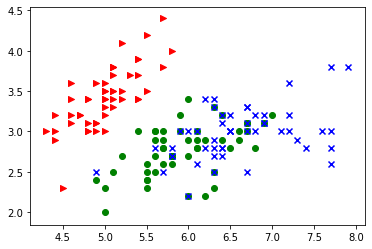

In [18]:
# graficar las clases con colores diferentes
for t,marker,c in zip(range(3),">ox","rgb"):
    plt.scatter(caracteristicas[objetivo == t,0],caracteristicas[objetivo == t,1],marker=marker,c=c)

# Usando PCA

In [0]:
# usando PCA
from sklearn.decomposition import PCA

In [0]:
# usando el PCA
pca_X = datos.data
pca_y = datos.target
pca = PCA(n_components=2)
# redución de dimensiones
reduced_X = pca.fit_transform(pca_X)

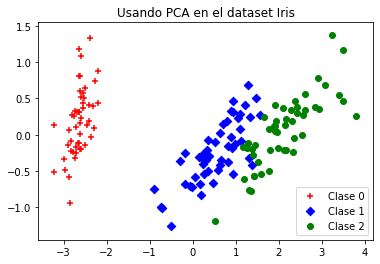

In [21]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []
for i in range(len(reduced_X)):
    if pca_y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif pca_y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])
        #
plt.scatter(red_x, red_y, c='r', marker='+',label='Clase 0')
plt.scatter(blue_x, blue_y, c='b', marker='D',label='Clase 1')
plt.scatter(green_x, green_y, c='g', marker='o',label='Clase 2')
plt.title('Usando PCA en el dataset Iris')
plt.legend()
plt.show()

# Reconhecimento de DÍGITOS

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

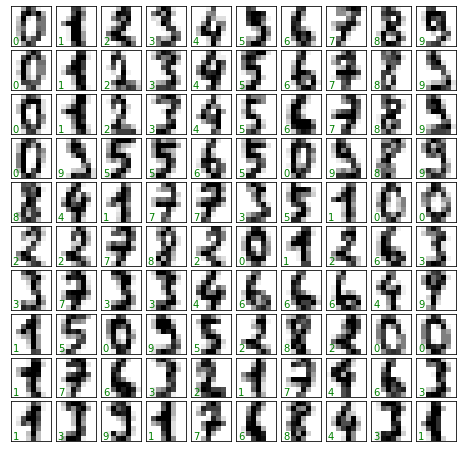

In [23]:
# Visualización grafica del dataset
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
#
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='green')

In [24]:
Xd = digits.data
Xd.shape

(1797, 64)

In [25]:
yd = digits.target
yd.shape

(1797,)

In [26]:
# reducción de la dimesión
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

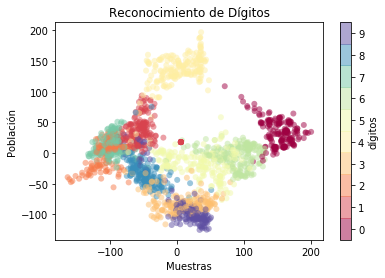

In [27]:
# graficando
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10))
#
plt.colorbar(label='dígitos', ticks=range(10))
plt.xlabel('Muestras')
plt.ylabel('Población')
plt.title('Reconocimiento de Dígitos')
plt.clim(-0.5, 9.5)
plt.show()

## Reconocimiento

In [0]:
from sklearn.model_selection import train_test_split
Xtrain_d, Xtest_d, ytrain_d, ytest_d = train_test_split(Xd, yd, random_state=0)

In [0]:
# usando el modelo gausinano del vezino proximo
from sklearn.naive_bayes import GaussianNB
modelo_d = GaussianNB()
modelo_d.fit(Xtrain_d, ytrain_d)
y_modelo_d = modelo_d.predict(Xtest_d)

In [30]:
# acurácia - precisión
from sklearn.metrics import accuracy_score
pres = accuracy_score(ytest_d, y_modelo_d)*100
print('Pecision = %.2f'%pres,'%')

Pecision = 83.33 %


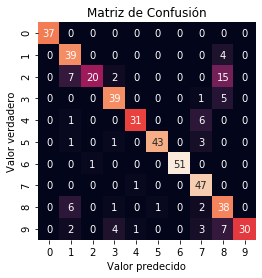

In [31]:
# graficando los resultados
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest_d, y_modelo_d)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Valor predecido')
plt.ylabel('Valor verdadero')
plt.title('Matriz de Confusión')
plt.show()

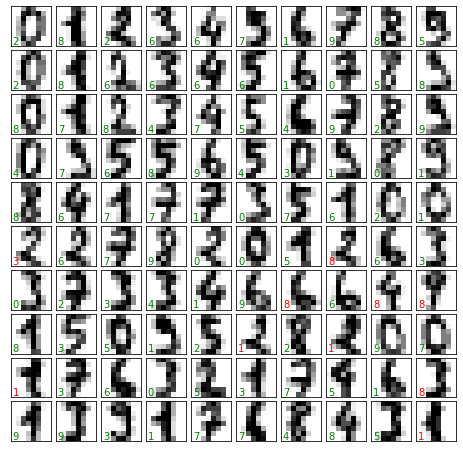

In [32]:
# Reconhecimento de los dígitos
#
fig, axes = plt.subplots(10, 10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_modelo_d[i]),transform=ax.transAxes,
            color='green' if (ytest_d[i] == y_modelo_d[i]) else 'red')

### Reconhecimento:
- correto = cor verde
- incorreto = cor vermeho

# Perceptron - OU

### Entrada de datos

In [0]:
# Entradas x1 e x2
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

### Salida de datos

In [0]:
# salida y
y = np.array([0, 1, 1, 1])

## Gnerando el gráfico inicial

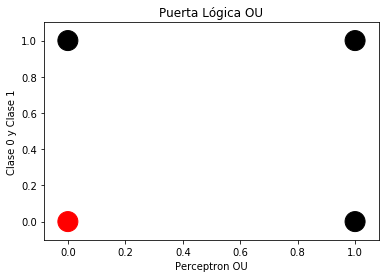

In [35]:
# generando el gráfico inicial
colormap = np.array(['r','k'])
plt.scatter(X.T[0], X.T[1],c=colormap[y],s=400)
plt.xlabel('Perceptron OU')
plt.ylabel('Clase 0 y Clase 1')
plt.title('Puerta Lógica OU')
plt.show()
#

## Creando el modelo Perceptron

In [36]:
# modelo
from sklearn.linear_model import perceptron as p
net = p.Perceptron(max_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
# entrena el modelo
net.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.002,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=None, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Visualizando los resultados

In [37]:
# imprimindo los resultados
print("Predicción :> ", str(net.predict(X)))
print("Actual   :> " , str(y))
print("Precisión :> " , str(net.score(X, y)*100) + "%")


Predicción :>  [0 1 1 1]
Actual   :>  [0 1 1 1]
Precisión :>  100.0%


## Calculando el hiperplano (linea recta)

[0.004 0.004]
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


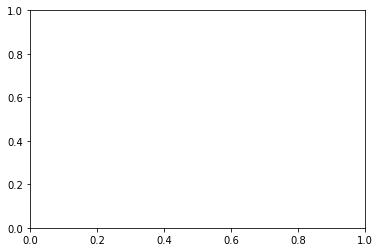

In [38]:
# Calculando el hperplano (linea recta)
ymin, ymax = plt.ylim()
w = net.coef_[0]
print(w) # imprime la matriz de pesos
a = -w[0] / w[1]
xx = np.linspace(ymin, ymax)
print(xx)
yy = a * xx - (net.intercept_[0]) / w[1]

## Graficando la separación de las clases

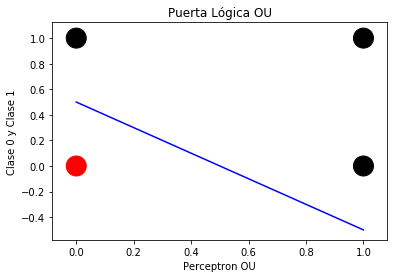

In [39]:
# plotando los datos originais
colormap = np.array(['r','k'])
plt.scatter(X.T[0], X.T[1],c=colormap[y],s=400)
plt.xlabel('Perceptron OU')
plt.ylabel('Clase 0 y Clase 1')
plt.title('Puerta Lógica OU')
#
# Plota la linea de separación
plt.plot(xx,yy, 'b-');

## Ejercicio: Hacer para AND e XOR